<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Инструкция-по-выполнению-проекта" data-toc-modified-id="Инструкция-по-выполнению-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Инструкция по выполнению проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Загрузка-данных-и-ресемплирование-по-одному-часу" data-toc-modified-id="Загрузка-данных-и-ресемплирование-по-одному-часу-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных и ресемплирование по одному часу</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Аддитивное-разложение-временного-ряда-на-компоненты" data-toc-modified-id="Аддитивное-разложение-временного-ряда-на-компоненты-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Аддитивное разложение временного ряда на компоненты</a></span></li><li><span><a href="#Проверка-временного-ряда-на-стационарность" data-toc-modified-id="Проверка-временного-ряда-на-стационарность-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка временного ряда на стационарность</a></span></li><li><span><a href="#Автокорреляция" data-toc-modified-id="Автокорреляция-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Автокорреляция</a></span></li></ul></li><li><span><a href="#Моделирование-и-построение-прогноза" data-toc-modified-id="Моделирование-и-построение-прогноза-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Моделирование и построение прогноза</a></span><ul class="toc-item"><li><span><a href="#Создадим-новые-признаки" data-toc-modified-id="Создадим-новые-признаки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Создадим новые признаки</a></span></li><li><span><a href="#Разбиение-данных-на-тренировочную,-валидационную-и-тестовую-выборки" data-toc-modified-id="Разбиение-данных-на-тренировочную,-валидационную-и-тестовую-выборки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Разбиение данных на тренировочную, валидационную и тестовую выборки</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#ElasticNet" data-toc-modified-id="ElasticNet-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>ElasticNet</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#Prophet" data-toc-modified-id="Prophet-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Prophet</a></span></li><li><span><a href="#SARIMAX" data-toc-modified-id="SARIMAX-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>SARIMAX</a></span></li><li><span><a href="#Выбор-модели" data-toc-modified-id="Выбор-модели-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Выбор модели</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

#  Прогнозирование заказов такси

## Описание проекта

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики _RMSE_ на тестовой выборке должно быть не больше 48.

### Инструкция по выполнению проекта

1.  Загрузите данные и выполните их ресемплирование по одному часу.
2.  Проанализируйте данные.
3.  Обучите разные модели с различными гиперпараметрами. Сделайте тестовую выборку размером 10% от исходных данных.
4.  Проверьте данные на тестовой выборке и сделайте выводы.

### Описание данных

Данные лежат в файле `/datasets/taxi.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/taxi.csv).

Количество заказов находится в столбце '_num_orders_' (от англ. _number of orders_, «число заказов»).

In [22]:
%%capture
!pip install prophet

In [23]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from pylab import rcParams

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from pmdarima import auto_arima
# импортируем автокорреляционную функцию (ACF)
from statsmodels.graphics.tsaplots import plot_acf

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import (TimeSeriesSplit, 
                                     GridSearchCV, 
                                     RandomizedSearchCV, 
                                     train_test_split,
                                     TimeSeriesSplit,
                                    cross_val_score)

from sklearn.linear_model import LinearRegression, ElasticNet

import lightgbm as lgb
from prophet import Prophet

## Загрузка данных и ресемплирование по одному часу

In [24]:
def data_read(df_name):
    try:
        data = pd.read_csv(f'C:\\Users\\m5612\\Downloads\\{df_name}.csv', 
        index_col=[0], parse_dates=True)
    except:
        data = pd.read_csv(f'https://code.s3.yandex.net/datasets/{df_name}.csv', 
        index_col=[0], parse_dates=True)
    return data

In [25]:
data = data_read('taxi')
data.head(3)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [26]:
data = data.resample('1H').sum()

In [27]:
data.head(3)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


## Изучение данных

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_orders,4416.0,84.422781,45.023853,0.0,54.0,78.0,107.0,462.0


проверим, в хронологическом ли порядке расположены даты и время:

In [30]:
data.index.is_monotonic

True

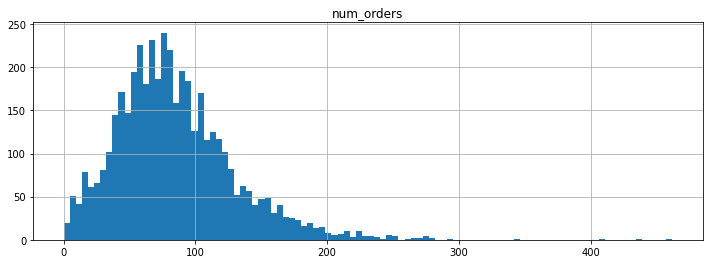

In [31]:
data.hist(bins=100, figsize=(12, 4));

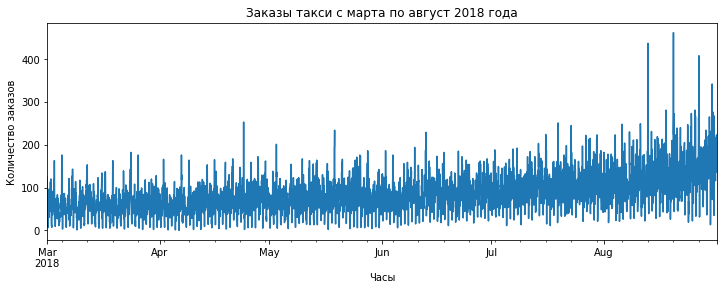

In [32]:
ax = data.plot(figsize=(12, 4), legend = None)
ax.set(title = 'Заказы такси с марта по август 2018 года', 
       xlabel = 'Часы', ylabel = 'Количество заказов');

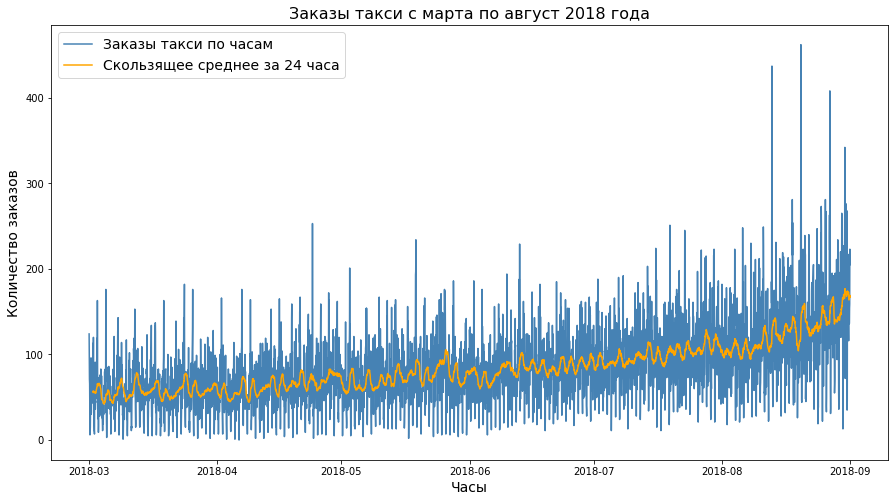

In [33]:
# зададим размер графика
plt.figure(figsize = (15,8))

# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(data, label = 'Заказы такси по часам', color = 'steelblue')
plt.plot(data.rolling(window = 24).mean(), label = 'Скользящее среднее за 24 часа', color = 'orange')

# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

# добавим подписи к осям и заголовки
plt.xlabel('Часы', fontsize = 14)
plt.ylabel('Количество заказов', fontsize = 14)
plt.title('Заказы такси с марта по август 2018 года', fontsize = 16)

# выведем обе кривые на одном графике
plt.show()

### Аддитивное разложение временного ряда на компоненты

Аддитивное разложение (англ. additive decomposition) - это метод анализа временных рядов, который позволяет разложить ряд на несколько компонентов: тренд, сезонность и остаточную (случайную) компоненту.

Аддитивное разложение предполагает, что каждая компонента ряда складывается с другими компонентами, т.е. аддитивно.

Формально, аддитивное разложение временного ряда можно записать в следующей форме:

y(t) = T(t) + S(t) + e(t)

где y(t) - значение ряда в момент времени t, T(t) - трендовая компонента, S(t) - сезонная компонента, e(t) - остаточная (случайная) компонента.

Трендовая компонента отражает долгосрочные изменения в ряде, сезонная компонента - повторяющиеся колебания внутри года или другого периода, остаточная компонента - все оставшееся, включая шумы, случайные флуктуации и т.д.

Аддитивное разложение может помочь визуально и количественно оценить влияние тренда и сезонности на временной ряд, а также оценить остаточную дисперсию, которая может быть использована для моделирования и прогнозирования ряда.

In [34]:
decomposed = seasonal_decompose(data) 

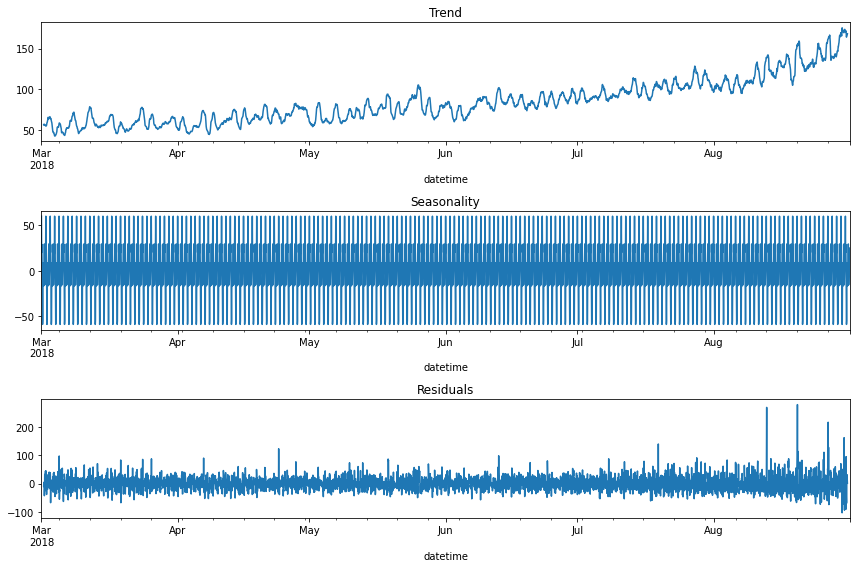

In [35]:
plt.figure(figsize=(12, 8))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()
plt.show()

Альтернативный вариант с ограничением 100 дней.

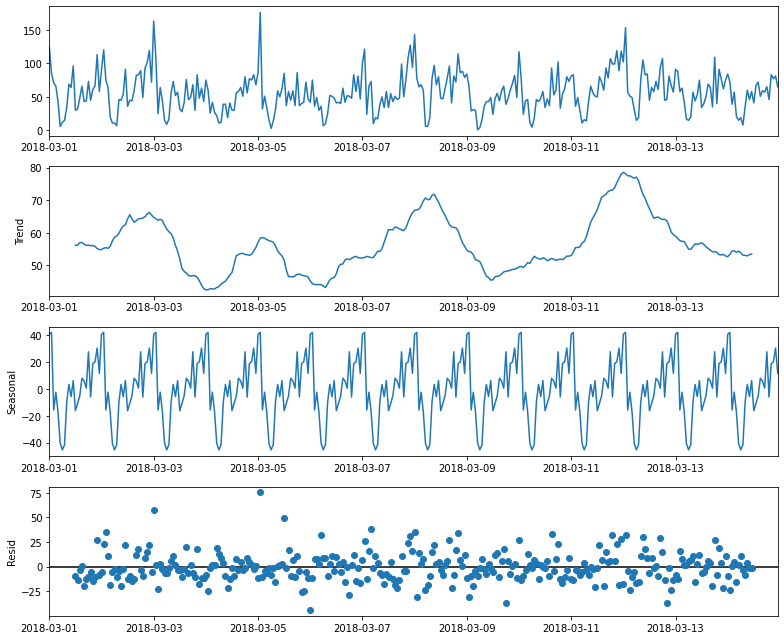

In [36]:
decomposed = seasonal_decompose(data.loc[data.index < '2018-03-15']) 

# задаем размер графика
rcParams['figure.figsize'] = 11, 9

decomposed.plot()

plt.show()

### Проверка временного ряда на стационарность

In [37]:
# проведем тест Дики-Фуллера (Dickey-Fuller test)
adf_test = adfuller(data['num_orders'])

# выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.028940051402612906


Тест Дики-Фуллера - это статистический тест, который используется для проверки наличия единичного корня во временных рядах. Единичный корень означает, что ряд является нестационарным и имеет долгосрочный тренд, что может сказаться на анализе данных и прогнозировании.

Одним из результатов теста является p-value, который является вероятностью получить такое же или более экстремальное значение статистики теста, если бы нулевая гипотеза была верна. В данном случае, нулевая гипотеза состоит в том, что ряд имеет единичный корень и является нестационарным.

Значение p-value равное 0,029 означает, что вероятность получить такое же или более экстремальное значение статистики теста, если бы нулевая гипотеза была верна, составляет всего 2,89%. Это меньше общепринятого уровня значимости 0,05, что говорит о том, что мы можем отвергнуть нулевую гипотезу и сделать вывод о том, что данные не созданы процессом с единичным корнем.

Таким образом, результаты теста Дики-Фуллера указывают на то, что временной ряд является стационарным. 

### Автокорреляция

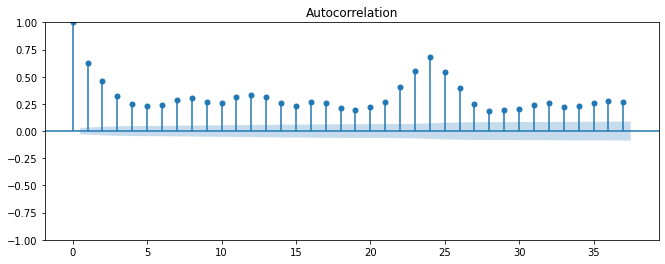

In [38]:
rcParams['figure.figsize'] = 11, 4
plot_acf(data)
plt.show()

Автокорреляция достаточно сильна и ее можно использовать при построении модели.

Автокорреляция - это статистическая мера, которая описывает связь между значениями во временном ряду и его отстающими значениями. Она показывает, насколько сильно значения ряда на разных временных отрезках коррелируют друг с другом.

Для определения автокорреляции используется коэффициент корреляции Пирсона между рядом и его отстающими значениями. Значения коэффициента корреляции находятся в диапазоне от -1 до 1, где -1 означает полную отрицательную корреляцию, 0 - отсутствие корреляции и 1 - полную положительную корреляцию.

Если автокорреляция высока для отстающих значений ряда, то это может свидетельствовать о наличии тренда или цикличности в данных. Напротив, если автокорреляция близка к нулю, то это может указывать на случайный характер изменений в данных.

Анализ автокорреляции может быть полезным инструментом при работе с временными рядами, так как он позволяет определить наличие определенных закономерностей в данных и выбрать соответствующую модель для анализа и прогнозирования ряда.

## Моделирование и построение прогноза

### Создадим новые признаки

In [39]:
def make_features(data, max_lag, rolling_mean_size):
    data_new = data.copy()  # создание копии входного датафрейма
    data_new['hour'] = data_new.index.hour
    data_new['month'] = data_new.index.month
    data_new['day'] = data_new.index.day
    data_new['dayofweek'] = data_new.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data_new['lag_{}'.format(lag)] = data_new['num_orders'].shift(lag)

    data_new['rolling_mean'] = data_new['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data_new  # возвращение измененной копии датафрейма

In [40]:
df = make_features(data, 72, 24*3)

In [41]:
df = df.dropna()

In [42]:
df.head(3)

,num_orders,hour,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_64,lag_65,lag_66,lag_67,lag_68,lag_69,lag_70,lag_71,lag_72,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-04 00:00:00,75,0,3,4,6,43.0,63.0,48.0,83.0,30.0,...,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,57.777778
2018-03-04 01:00:00,60,1,3,4,6,75.0,43.0,63.0,48.0,83.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,57.097222
2018-03-04 02:00:00,26,2,3,4,6,60.0,75.0,43.0,63.0,48.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,56.750000
2018-03-04 03:00:00,42,3,3,4,6,26.0,60.0,75.0,43.0,63.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,56.125000
2018-03-04 04:00:00,27,4,3,4,6,42.0,26.0,60.0,75.0,43.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,55.791667


### Разбиение данных на тренировочную, валидационную и тестовую выборки

In [43]:
train_valid, test = train_test_split(df, shuffle=False, test_size=0.1)
train, valid = train_test_split(train_valid, shuffle=False, test_size=1/9)
# альтернативный вариант 
# train_size = int(len(data) * 0.8)
# train, test = data.iloc[:train_size], data.iloc[train_size:]

In [44]:
X_train = train.drop('num_orders', axis=1)
y_train = train['num_orders']
X_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']
X_train_valid = train_valid.drop('num_orders', axis=1)
y_train_valid = train_valid['num_orders']
X_valid = valid.drop('num_orders', axis=1)
y_valid = valid['num_orders']

In [45]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_train_valid shape:", X_train_valid.shape)
print("y_train_valid shape:", y_train_valid.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)

X_train shape: (3474, 77)
y_train shape: (3474,)
X_test shape: (435, 77)
y_test shape: (435,)
X_train_valid shape: (3909, 77)
y_train_valid shape: (3909,)
X_valid shape: (435, 77)
y_valid shape: (435,)


### LinearRegression

Кросс-валидация временных рядов отличается от кросс-валидации на обычных датафреймах тем, что она учитывает временную составляющую данных. Это связано с тем, что в случае временных рядов порядок наблюдений играет ключевую роль, и мы не можем просто перемешать данные случайным образом для разбиения на фолды.

В кросс-валидации временных рядов используется метод TimeSeriesSplit, который разбивает временной ряд на последовательные перекрывающиеся фолды, сохраняя порядок наблюдений. При этом каждый фолд используется для тестирования модели, а предшествующие ему фолды используются для обучения модели.

In [46]:
# разбиваем временной ряд на фолды
tscv = TimeSeriesSplit(n_splits=8)

In [47]:
%%time
model_lr = LinearRegression()

rmse_list = cross_val_score(
            model_lr,
            X_train_valid,
            y_train_valid,
            cv=tscv,
            scoring='neg_root_mean_squared_error'
        )

print("Mean RMSE on cross-validation: ", -rmse_list.mean())
rmse_list

Mean RMSE on cross-validation:  370692245046.3756
CPU times: user 783 ms, sys: 1.42 s, total: 2.2 s
Wall time: 2.17 s


array([-2.96553796e+12, -2.09114481e+01, -2.08845319e+01, -2.35571219e+01,
       -2.19658602e+01, -2.40691637e+01, -2.71027106e+01, -3.08322878e+01])

визуализируем фолды:

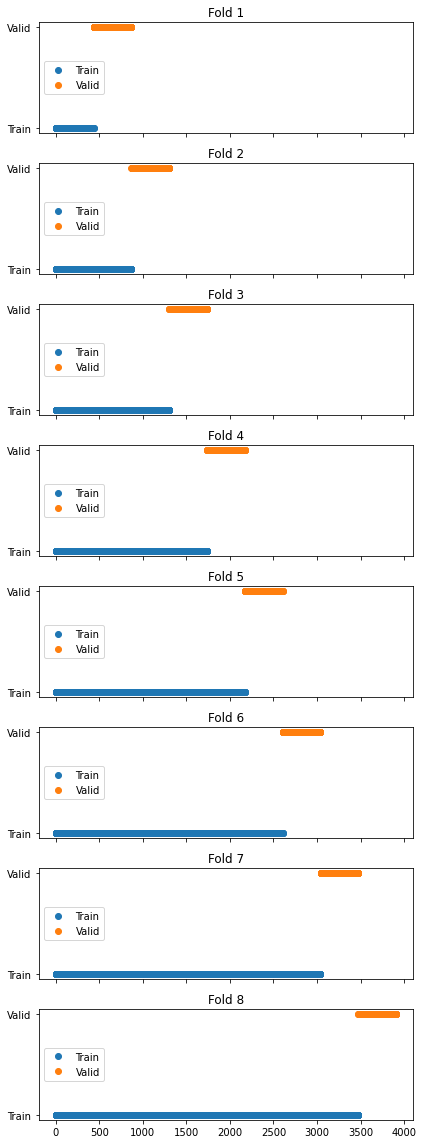

In [48]:
tscv = TimeSeriesSplit(n_splits=8)
fig, axs = plt.subplots(nrows=8, figsize=(6, 16), sharex=True)

for fold_idx, (train_idx, valid_idx) in enumerate(tscv.split(X_train_valid)):
    axs[fold_idx].plot(train_idx, [0] * len(train_idx), 'o', label='Train')
    axs[fold_idx].plot(valid_idx, [1] * len(valid_idx), 'o', label='Valid')
    axs[fold_idx].set_yticks([0, 1])
    axs[fold_idx].set_yticklabels(['Train', 'Valid'])
    axs[fold_idx].set_title(f"Fold {fold_idx + 1}")
    axs[fold_idx].legend(loc='center left')
    
plt.tight_layout()
plt.show()

In [49]:
%%time
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_valid)
rmse_lr = round(mean_squared_error(y_pred_lr, y_valid, squared=False), 2)
print("RMSE of the validation set: ", rmse_lr)

RMSE of the validation set:  30.8
CPU times: user 83.1 ms, sys: 91.3 ms, total: 174 ms
Wall time: 121 ms


### ElasticNet

ElasticNet - это модель регрессии, которая комбинирует две методики регуляризации - L1-регуляризацию (Lasso) и L2-регуляризацию (Ridge). Она используется для уменьшения влияния мультиколлинеарности (высокой корреляции между признаками) и для отбора признаков.

Модель ElasticNet решает задачу минимизации суммы квадратов ошибок (RSS) с ограничениями на сумму модулей коэффициентов (L1-норма) и сумму квадратов коэффициентов (L2-норма).

За счет использования обеих регуляризаций, ElasticNet может обеспечивать лучшую производительность, чем Lasso или Ridge, когда в данных присутствуют признаки с высокой корреляцией друг с другом. Кроме того, ElasticNet позволяет выполнить отбор признаков, установив нулевые коэффициенты для некоторых признаков, что может улучшить интерпретируемость модели.

In [50]:
%%time
# define the hyperparameter grid to search over
param_grid = {
    'alpha': [1, 5],
    'l1_ratio': [0.1, 1]
}

# create an instance of the ElasticNet model
model = ElasticNet()

# split the time series into folds using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=8)

# perform cross-validation with hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, cv=tscv, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_valid, y_train_valid)

# print the best hyperparameters and the mean RMSE on the cross-validation folds
print("Best hyperparameters: ", grid_search.best_params_)
print("Mean RMSE on cross-validation: ", -grid_search.best_score_)

Best hyperparameters:  {'alpha': 5, 'l1_ratio': 1}
Mean RMSE on cross-validation:  23.550644037737484
CPU times: user 3.43 s, sys: 4.95 s, total: 8.38 s
Wall time: 8.4 s


In [51]:
model_el = ElasticNet(**grid_search.best_params_)
model_el.fit(X_train, y_train)
y_pred_el = model_el.predict(X_valid)
rmse_el = round(mean_squared_error(y_pred_el, y_valid, squared=False), 2)
print("RMSE of the validation set: ", rmse_el)

RMSE of the validation set:  30.58


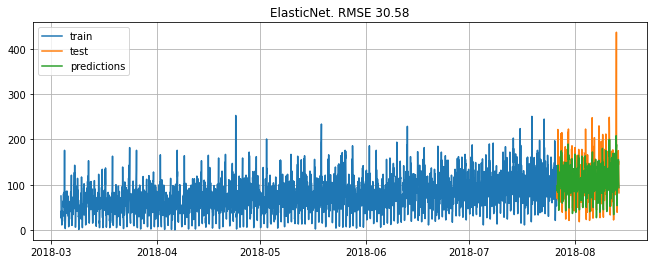

In [52]:
# Displaying a plot with the predictions and true values
plt.plot(X_train.index, y_train, label='train')
plt.plot(X_valid.index, y_valid, label='test')
plt.plot(X_valid.index, y_pred_el, label='predictions')
plt.legend()
plt.grid(True)
plt.title("ElasticNet. RMSE {}".format (rmse_el))
plt.show()

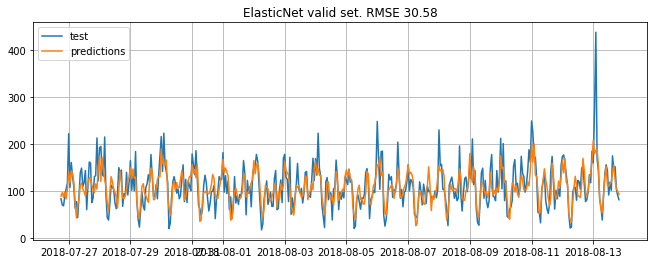

In [53]:
plt.plot(X_valid.index, y_valid, label='test')
plt.plot(X_valid.index, y_pred_el, label='predictions')
plt.legend()
plt.grid(True)
plt.title("ElasticNet valid set. RMSE {}".format(rmse_el))
plt.show()

### LGBMRegressor

LGBMRegressor (LightGBM Regressor) - это реализация градиентного бустинга над решающими деревьями, которая использует алгоритм LightGBM, разработанный компанией Microsoft. Он является быстрым и масштабируемым алгоритмом, который может использоваться для задач регрессии.

LGBMRegressor использует градиентный бустинг над деревьями решений, где каждое дерево строится на основе предыдущего дерева. В отличие от других алгоритмов бустинга, LightGBM использует гистограммы для быстрого вычисления градиента и поддержки категориальных признаков. Он также использует метод "leaf-wise" для построения деревьев, который может улучшить производительность, уменьшив глубину дерева.

LGBMRegressor имеет множество гиперпараметров, которые можно настраивать, включая:

- learning_rate - скорость обучения
- max_depth - максимальная глубина дерева
- num_leaves - максимальное количество листьев в дереве
- min_child_samples - минимальное количество обучающих наблюдений, которые требуются для создания нового узла дерева
- reg_alpha - L1-регуляризация коэффициентов дерева
- reg_lambda - L2-регуляризация коэффициентов дерева

LGBMRegressor также имеет встроенную поддержку для кросс-валидации и выбора гиперпараметров, что позволяет оптимизировать модель для задач регрессии.

In [33]:
%%time
# Определяем диапазоны для перебора гиперпараметров
param_grid = {'num_leaves': [25], #range(6, 40),
              'min_child_samples': [73], #range(50, 200),
              'subsample': [0.6], #np.arange(0.2, 1, 0.1),
              'colsample_bytree': [0.4], #np.arange(0.4, 1, 0.1),
              'reg_alpha': [0.5], #[0, 0.1, 0.5, 1],
              'reg_lambda': [0.5], #[0, 0.1, 0.5, 1],
              'learning_rate': [0.06], #np.arange(0.01, 0.2, 0.01),
              #'n_estimators': range(100, 1000)
             }

# Инициализируем модель LGBM
lgb_model = lgb.LGBMRegressor(random_state=42)

# Определяем генератор разбиений TimeSeriesSplit
#tscv = TimeSeriesSplit(n_splits=8)

# Инициализируем объект RandomizedSearchCV
lgb_random = RandomizedSearchCV(estimator=lgb_model, 
                                param_distributions=param_grid, 
                                n_iter=20, #100
                                scoring='neg_mean_squared_error', 
                                #cv=tscv.split(X_train),
                                random_state=42,
                                n_jobs=4,
                                verbose=1)

# Обучаем модель
lgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


CPU times: user 3min 41s, sys: 392 ms, total: 3min 41s
Wall time: 3min 49s


RandomizedSearchCV(estimator=LGBMRegressor(random_state=42), n_iter=20,
                   n_jobs=4,
                   param_distributions={'colsample_bytree': [0.4],
                                        'learning_rate': [0.06],
                                        'min_child_samples': [73],
                                        'num_leaves': [25], 'reg_alpha': [0.5],
                                        'reg_lambda': [0.5],
                                        'subsample': [0.6]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [34]:
# Выводим наилучшие гиперпараметры
print('Best parameters found by randomized search:', lgb_random.best_params_)

# Сохраняем наилучшую модель
best_lgb_model = lgb_random.best_estimator_

Best parameters found by randomized search: {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'num_leaves': 25, 'min_child_samples': 73, 'learning_rate': 0.06, 'colsample_bytree': 0.4}


In [35]:
booster = best_lgb_model.booster_

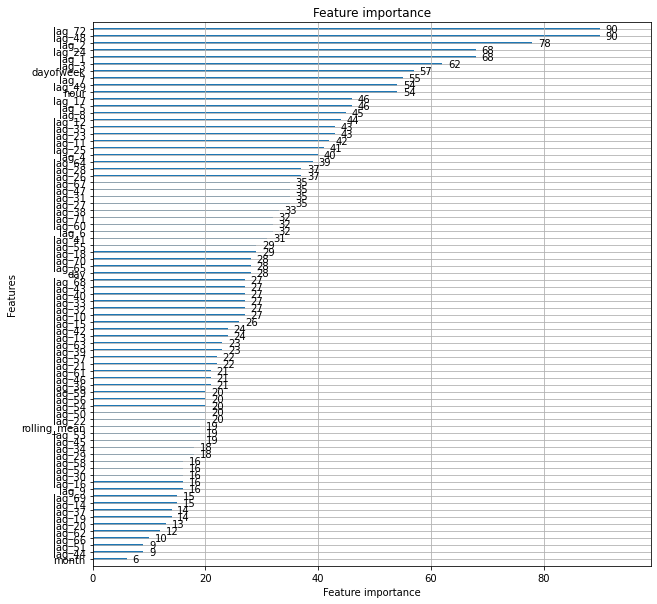

In [36]:
lgb.plot_importance(booster, figsize=(10, 10))
plt.show()

In [37]:
best_lgb_model

LGBMRegressor(colsample_bytree=0.4, learning_rate=0.06, min_child_samples=73,
              num_leaves=25, random_state=42, reg_alpha=0.5, reg_lambda=0.5,
              subsample=0.6)

In [38]:
# Оценим качество модели на валидационной выборке
y_pred_lgb = lgb_random.predict(X_valid)
rmse_lgb = round(mean_squared_error(y_valid, y_pred_lgb, squared=False), 2)

print("LGBM RMSE on the validation set:", rmse_lgb)

LGBM RMSE on the validation set: 31.46


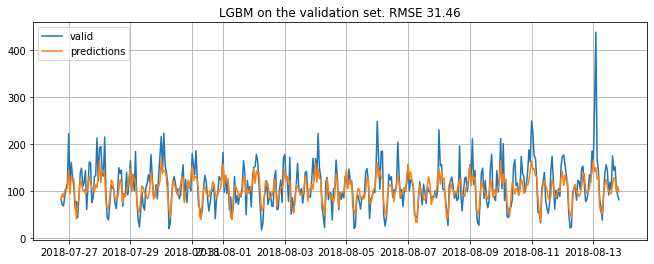

In [39]:
plt.plot(X_valid.index, y_valid, label='valid')
plt.plot(X_valid.index, y_pred_lgb, label='predictions')
plt.legend()
plt.grid(True)
plt.title("LGBM on the validation set. RMSE {}".format(rmse_lgb))
plt.show()

### Prophet

Prophet - это библиотека для прогнозирования временных рядов, разработанная командой Facebook. Она использует модель, основанную на добавлении составляющих временных рядов, включая тренд, сезонность и праздники. Она также может учитывать влияние регрессионных факторов, которые могут влиять на целевую переменную. Prophet позволяет легко и быстро строить прогнозы для временных рядов, обладает большим набором настраиваемых параметров и предоставляет функционал для визуализации результатов.

In [40]:
df_prophet = data.copy().reset_index().rename(columns={'datetime': 'ds', 'num_orders': 'y'})

In [41]:
train_valid, test = train_test_split(df_prophet, shuffle=False, test_size=0.1)
train, valid = train_test_split(train_valid, shuffle=False, test_size=1/9)

In [42]:
train.tail(2)

,ds,y
3530,2018-07-26 02:00:00,197
3531,2018-07-26 03:00:00,141


In [43]:
valid.shape[0]

442

In [44]:
m = Prophet()

In [45]:
m.fit(train)

20:01:54 - cmdstanpy - INFO - Chain [1] start processing
20:01:56 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
# создание будущего датафрейма
future = m.make_future_dataframe(periods=valid.shape[0], freq='H')

In [47]:
# получение прогноза
forecast = m.predict(future)

In [48]:
# удаляем отрицательные значения
#forecast['yhat'] = np.maximum(0, forecast['yhat'])

# оставляем только прогноз на будущее
forecast = forecast[forecast['ds'] > max(train['ds'])]

In [49]:
y_pred_prophet = forecast['yhat']

In [50]:
# считаем RMSE
rmse_prophet = round(mean_squared_error(valid['y'], forecast['yhat'], squared=False), 2)
print('Prophet, RMSE on the validation set:', rmse_prophet)

Prophet, RMSE on the validation set: 33.73


In [51]:
print('Интервал временного ряда: от', valid['ds'].min(), 'до', valid['ds'].max())

Интервал временного ряда: от 2018-07-26 04:00:00 до 2018-08-13 13:00:00


In [52]:
forecast.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3532,2018-07-26 04:00:00,104.119980,63.083204,123.597503,104.119980,104.119980,-11.000752,-11.000752,-11.000752,-11.610868,-11.610868,-11.610868,0.610116,0.610116,0.610116,0.0,0.0,0.0,93.119228
3533,2018-07-26 05:00:00,104.141568,38.605929,97.286316,104.141568,104.141568,-37.385092,-37.385092,-37.385092,-37.480113,-37.480113,-37.480113,0.095021,0.095021,0.095021,0.0,0.0,0.0,66.756476


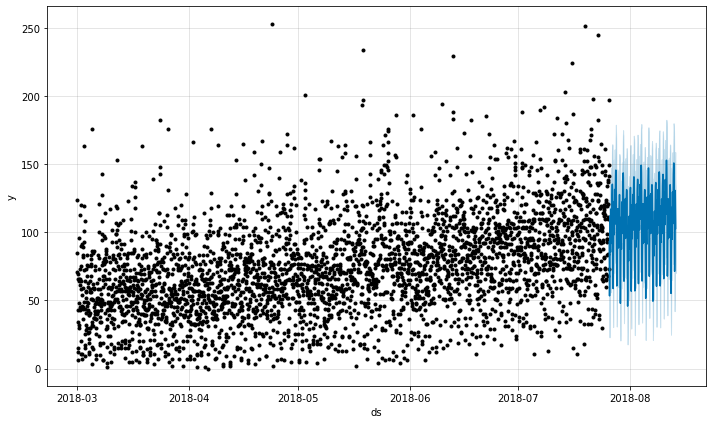

In [53]:
fig1 = m.plot(forecast)

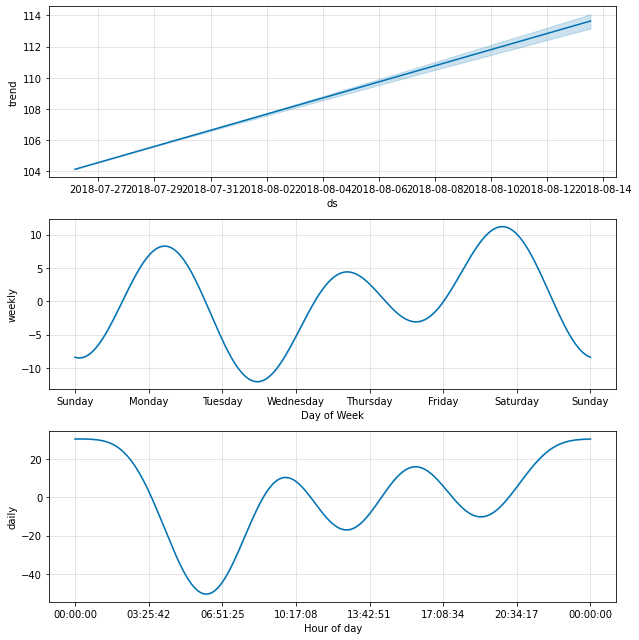

In [54]:
fig2 = m.plot_components(forecast)

### SARIMAX

SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) - это метод прогнозирования временных рядов, который расширяет популярную модель ARIMA (AutoRegressive Integrated Moving Average) путем включения экзогенных переменных в дополнение к автокоррелированным данным временного ряда.

Модель SARIMAX может использоваться для прогнозирования временных рядов на основе их собственных прошлых значений и значений других переменных, включая экзогенные переменные, которые могут влиять на прогнозируемый временной ряд.

SARIMAX использует компоненты ARIMA для моделирования автокоррелированных компонентов временного ряда, включая авторегрессионную (AR), интегрированную (I) и скользящую среднюю (MA) составляющие, а также учитывает сезонность в данных. Дополнительно, модель позволяет включать экзогенные регрессоры, которые могут быть связаны с прогнозируемой переменной, но не обязательно автокоррелированы.

SARIMAX широко используется в финансовом анализе, маркетинге, экономическом прогнозировании и других областях, где прогнозирование временных рядов является важным компонентом принятия решений.

In [55]:
%%time
train_valid, test = train_test_split(data, shuffle=False, test_size=0.1)
train, valid = train_test_split(train_valid, shuffle=False, test_size=1/9)

# Setting up SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))

CPU times: user 6.63 ms, sys: 0 ns, total: 6.63 ms
Wall time: 5.21 ms


In [56]:
%%time
# Fitting the model
model_fit = model.fit(disp=False)

# Getting predictions for the test set
y_pred_sarimax = model_fit.forecast(steps=len(valid))

CPU times: user 50 s, sys: 35.7 s, total: 1min 25s
Wall time: 1min 26s


In [57]:
# Computing the root mean squared error
rmse_sarimax = round(mean_squared_error(valid, y_pred_sarimax, squared=False), 2)
rmse_sarimax

31.49

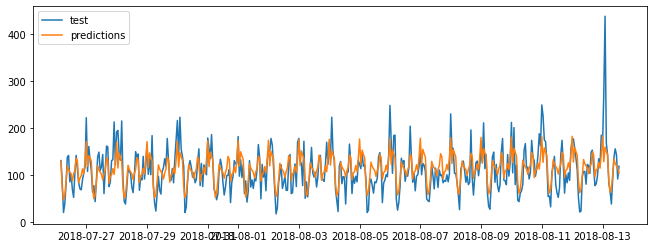

In [58]:
# Displaying a plot with the predictions and true values
plt.plot(valid.index, valid, label='test')
plt.plot(y_pred_sarimax.index, y_pred_sarimax, label='predictions')
plt.legend()
plt.show()

### Выбор модели

In [59]:
pd.DataFrame(columns=['model', 'RMSE'], 
             data={
                 'model':['LinearRegression', 'ElasticNet', 'LGBM', 'Prophet', 'SARIMAX'], 
                 'RMSE':[rmse_lr, rmse_el, rmse_lgb, rmse_prophet, rmse_sarimax]})

,model,RMSE
0,LinearRegression,30.80
1,ElasticNet,30.58
2,LGBM,31.46
3,Prophet,33.73
4,SARIMAX,31.49


Лучшая модель: ElasticNet с гиперпараметрами {'alpha': 5, 'l1_ratio': 1}, RMSE = 30.58

## Тестирование

In [60]:
model_el.fit(X_train_valid, y_train_valid)
y_pred_el_test = model_el.predict(X_test)
rmse_el_test = round(mean_squared_error(y_pred_el_test, y_test, squared=False), 2)
print("RMSE of the test set: ", rmse_el_test)

RMSE of the test set:  41.36


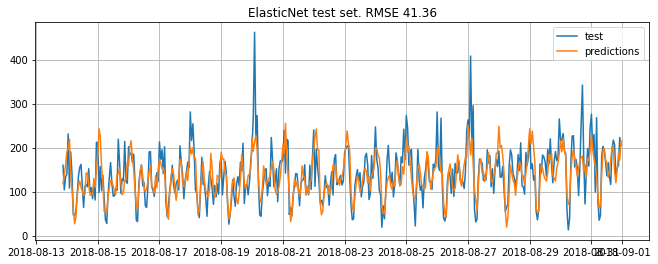

In [61]:
plt.plot(X_test.index, y_test, label='test')
plt.plot(X_test.index, y_pred_el_test, label='predictions')
plt.legend()
plt.grid(True)
plt.title("ElasticNet test set. RMSE {}".format(rmse_el_test))
plt.show()

## Выводы
В ходе анализа данных было выявлено несколько интересных фактов. Несмотря на то, что RMSE ElasticNet на тестовой выборке значительно ухудшилось с 30.58 до 41.36, данная модель соответствует условию по RMSE - значение не превышает 48. Более сложные модели, такие как Prophet, SARIMAX и LightGBM, показали более низкое качество, возможно, потому что им требуется дополнительная настройка. Тем не менее, мы обнаружили дневную и недельную сезонность в данных, а также стационарность временного ряда, что может быть полезной информацией при дальнейшем улучшении моделей.